In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from sklearn.neural_network import MLPClassifier
from utils import plot_weights_distribution
from utils import plot_gradients_distribution

from model import FFNN


In [7]:
def load_mnist():
    print("Loading MNIST dataset")
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
    
    X = X / 255
    
    y = y.astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    y_train_onehot = np.zeros((y_train.shape[0], 10))
    y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1
    
    y_test_onehot = np.zeros((y_test.shape[0], 10))
    y_test_onehot[np.arange(y_test.shape[0]), y_test] = 1
    
    print(f"Data loaded: X_train: {X_train.shape}, y_train: {y_train.shape}")
    
    return X_train, X_test, y_train, y_train_onehot, y_test, y_test_onehot

In [8]:
X_train, X_test, y_train, y_train_onehot, y_test, y_test_onehot = load_mnist()

Loading MNIST dataset
Data loaded: X_train: (56000, 784), y_train: (56000,)


In [9]:
def plot_loss_curves(histories: dict, title: str):
    plt.figure(figsize=(10, 6))
    for label, loss in histories.items():
        plt.plot(loss, label=label)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

def show_accuracy_table(acc_dict: dict, title="Akurasi Akhir"):
    df = pd.DataFrame.from_dict(acc_dict, orient='index', columns=["Accuracy"])
    display(df.sort_values(by="Accuracy", ascending=False).style.set_caption(title))

def train_and_evaluate(name, model, X_train, y_train, X_test, y_test):
    history = model.train(X_train, y_train, epochs=20, batch_size=32, learning_rate=0.01, verbose=0)
    pred = model.forward(X_test)
    pred_classes = np.argmax(pred, axis=1)
    acc = accuracy_score(np.argmax(y_test, axis=1), pred_classes)
    print(f"{name} Accuracy: {acc:.4f}")
    return history['train_loss'], acc, model

Width-64 Accuracy: 0.9594
Width-128 Accuracy: 0.9631
Width-256 Accuracy: 0.9646


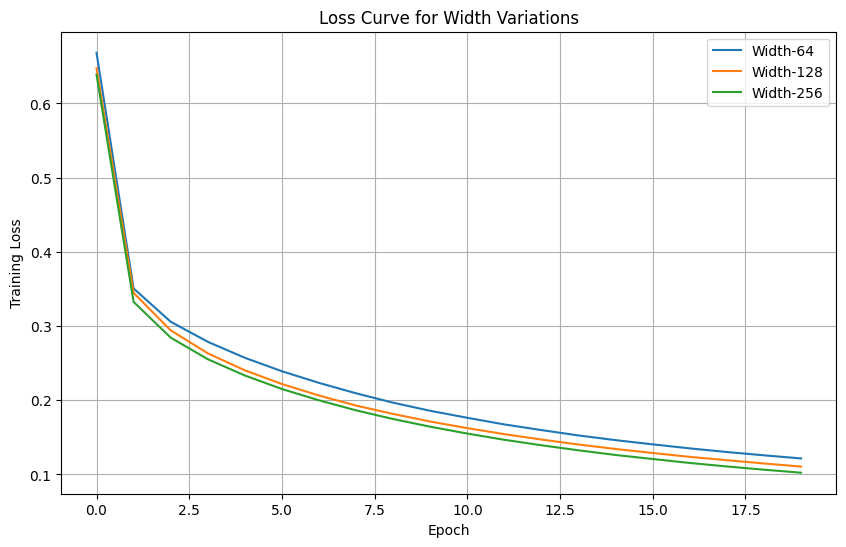

,Accuracy
Width-256,0.964571
Width-128,0.963071
Width-64,0.959357


In [10]:
##### EXPERIMENT 1: WIDTH VARIATION #####
widths = [64, 128, 256]
depth = 1
histories_width = {}
acc_width = {}

for w in widths:
    layers = [(784, None)] + [(w, "relu")] * depth + [(10, "softmax")]
    model = FFNN(layers_config=layers, loss="categorical_crossentropy", weight_init_method="he")
    history, acc, _ = train_and_evaluate(f"Width-{w}", model, X_train, y_train_onehot, X_test, y_test_onehot)
    histories_width[f"Width-{w}"] = history
    acc_width[f"Width-{w}"] = acc

plot_loss_curves(histories_width, "Loss Curve for Width Variations")
show_accuracy_table(acc_width, "Akurasi Akhir untuk Width Variasi")

Depth-1 Accuracy: 0.9631
Depth-2 Accuracy: 0.9724
Depth-3 Accuracy: 0.9734


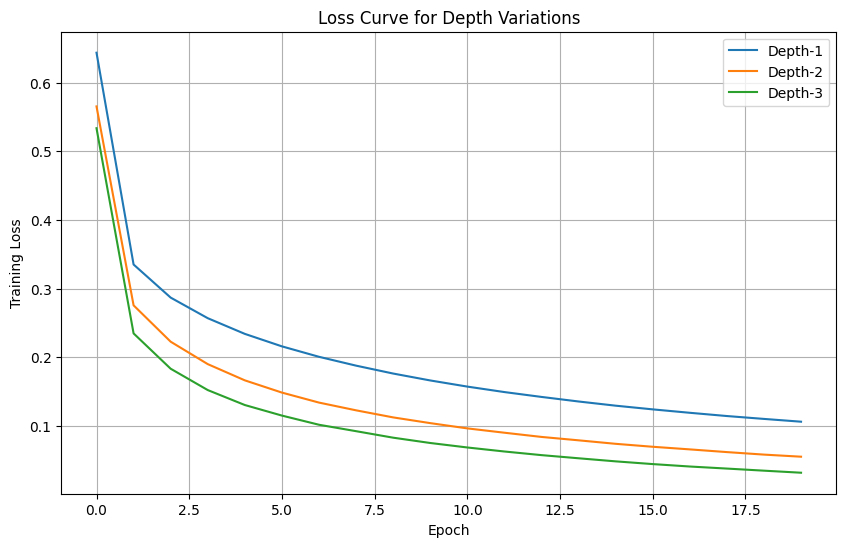

,Accuracy
Depth-3,0.973429
Depth-2,0.972357
Depth-1,0.963071


In [11]:
##### EXPERIMENT 2: DEPTH VARIATION #####
depths = [1, 2, 3]
width = 128
histories_depth = {}
acc_depth = {}

for d in depths:
    layers = [(784, None)] + [(width, "relu")] * d + [(10, "softmax")]
    model = FFNN(layers_config=layers, loss="categorical_crossentropy", weight_init_method="he")
    history, acc, _ = train_and_evaluate(f"Depth-{d}", model, X_train, y_train_onehot, X_test, y_test_onehot)
    histories_depth[f"Depth-{d}"] = history
    acc_depth[f"Depth-{d}"] = acc

plot_loss_curves(histories_depth, "Loss Curve for Depth Variations")
show_accuracy_table(acc_depth, "Akurasi Akhir untuk Depth Variasi")

Activation-linear Accuracy: 0.9206


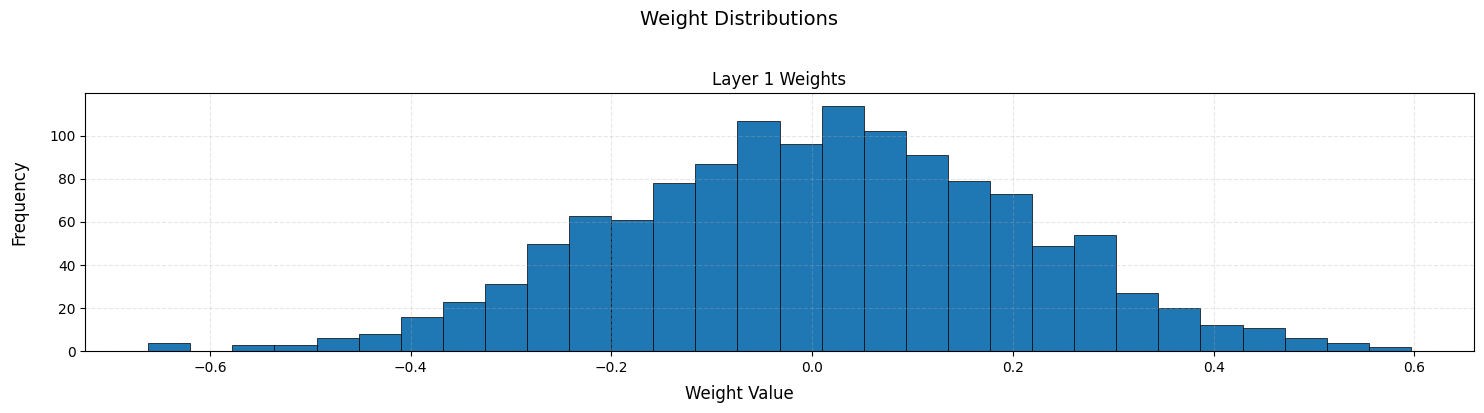

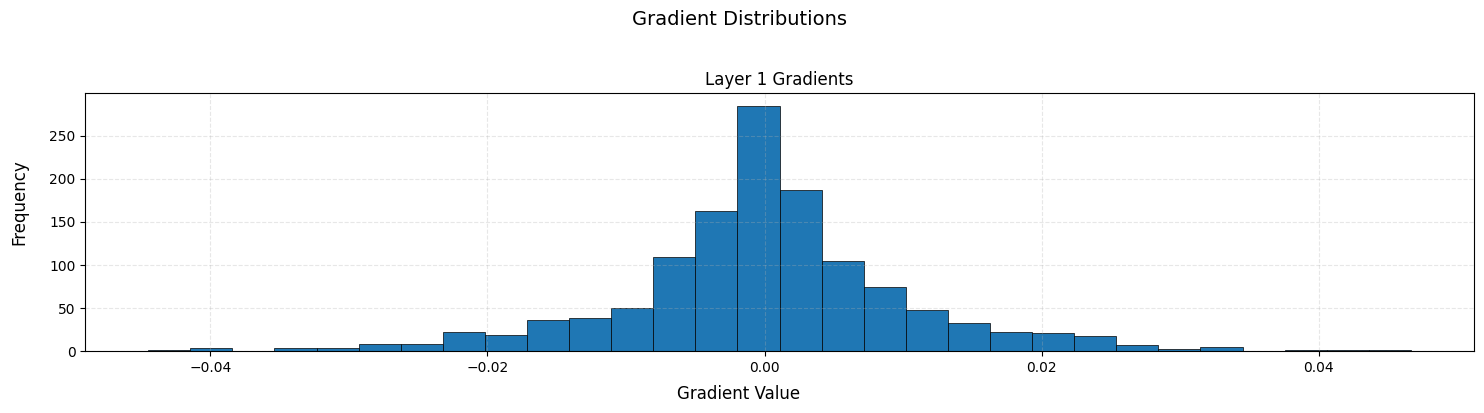

Activation-relu Accuracy: 0.9631


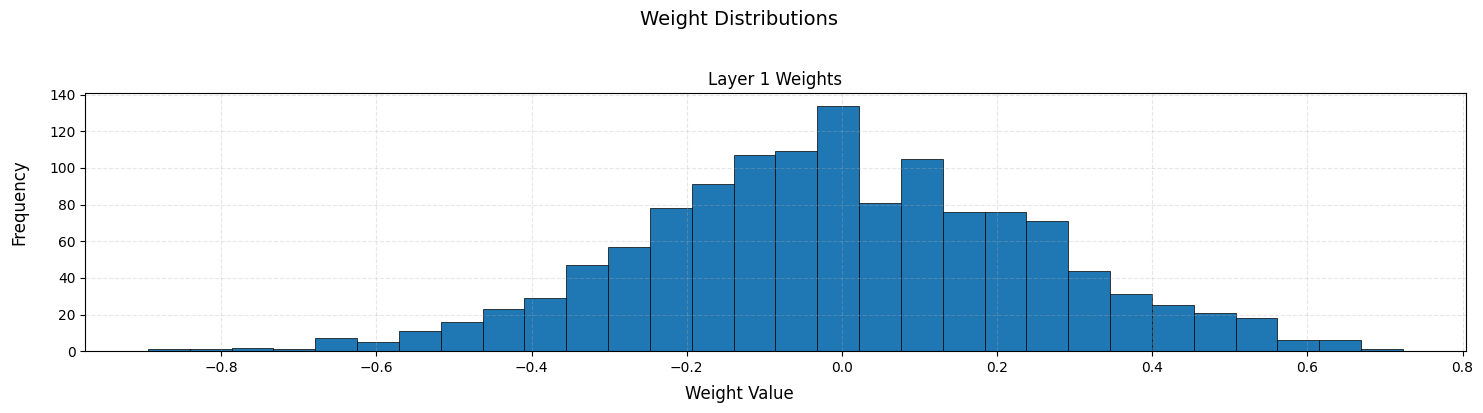

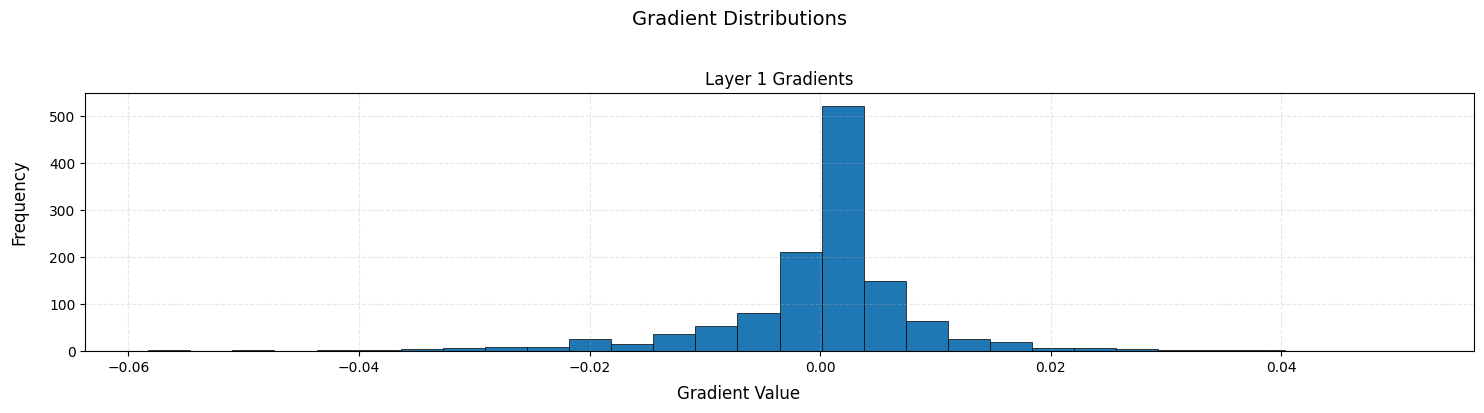

Activation-sigmoid Accuracy: 0.9196


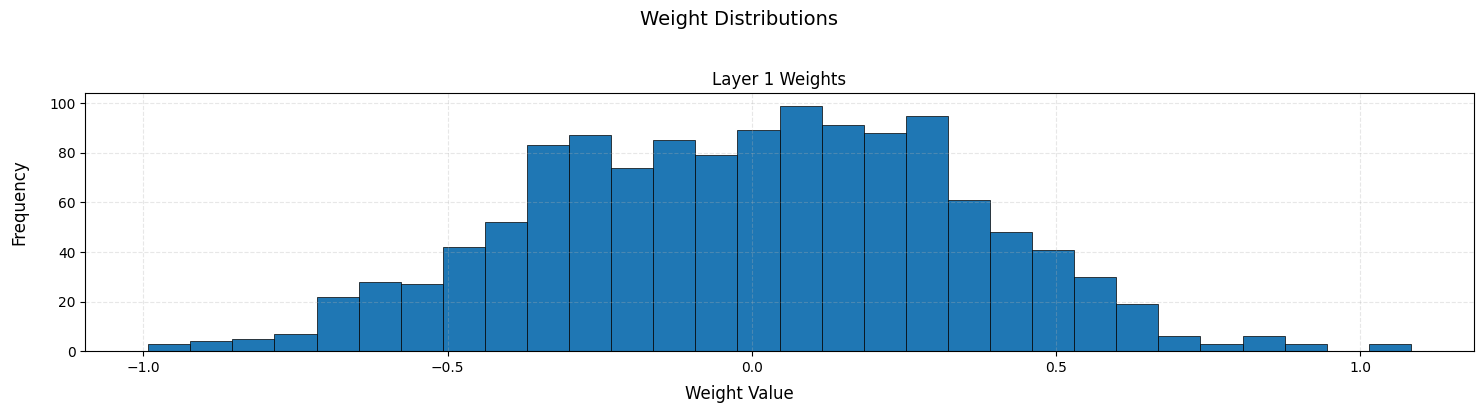

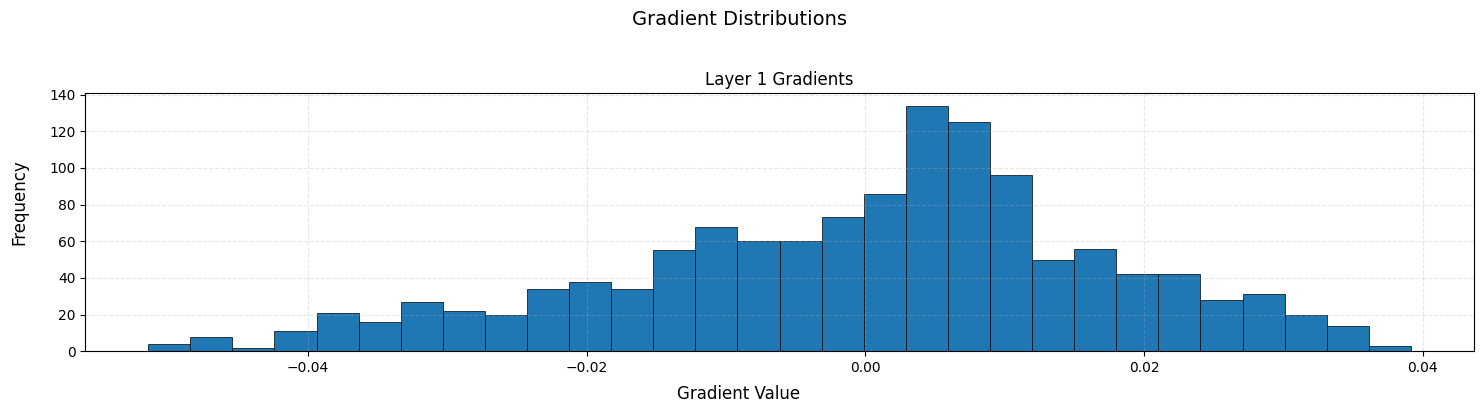

Activation-tanh Accuracy: 0.9539


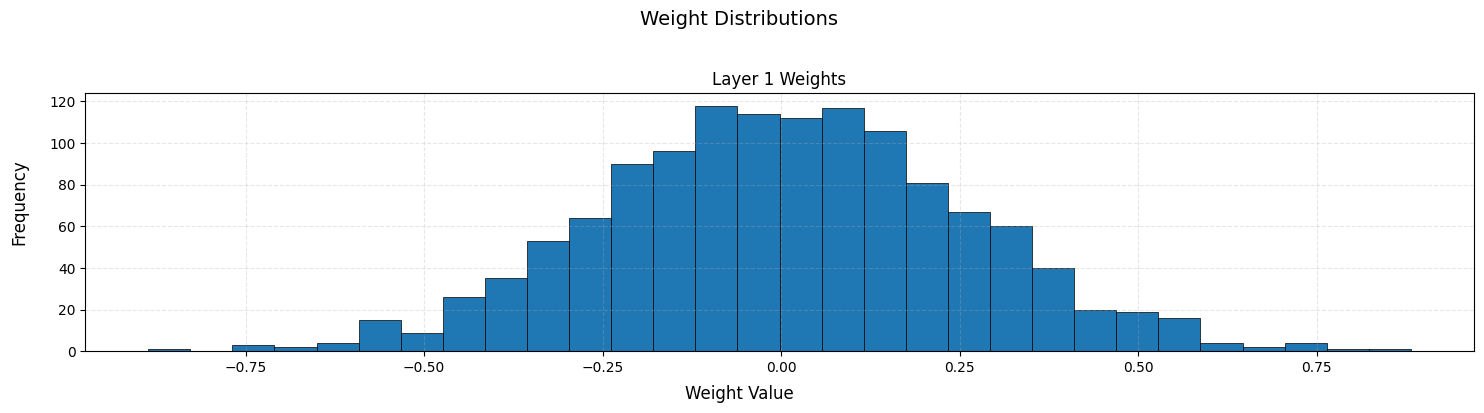

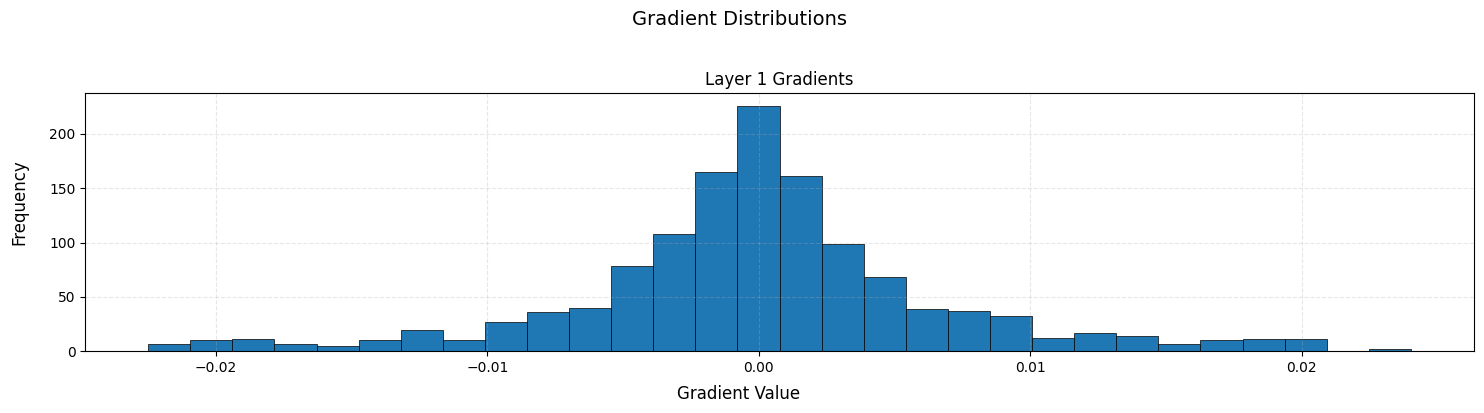

Activation-leakyrelu Accuracy: 0.9639


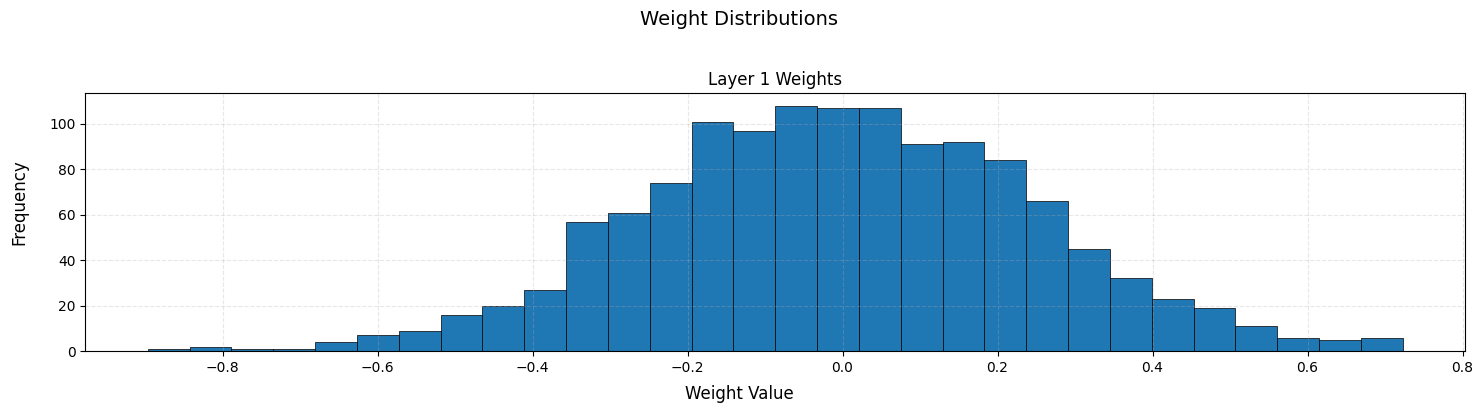

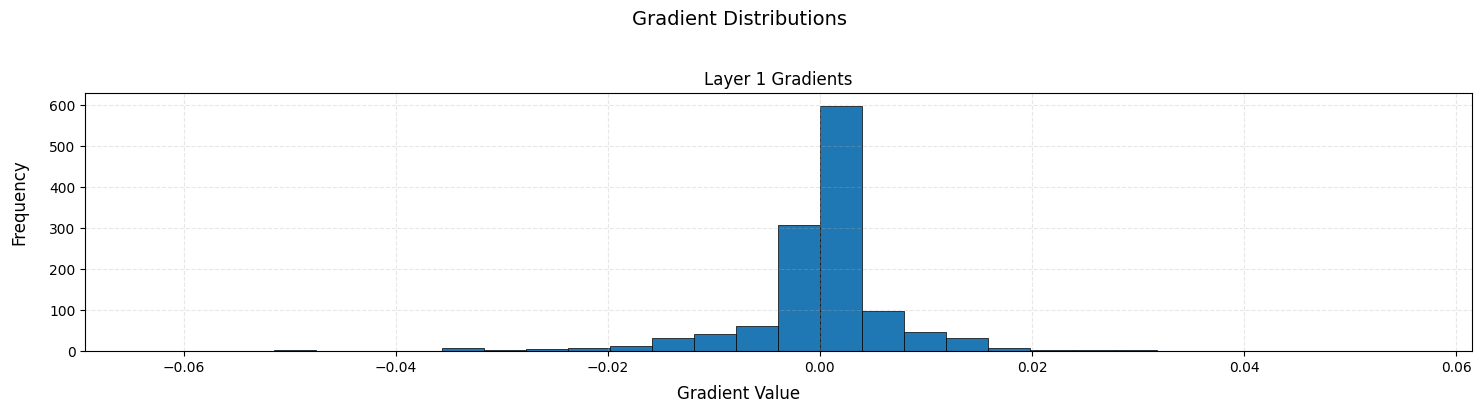

Activation-elu Accuracy: 0.9540


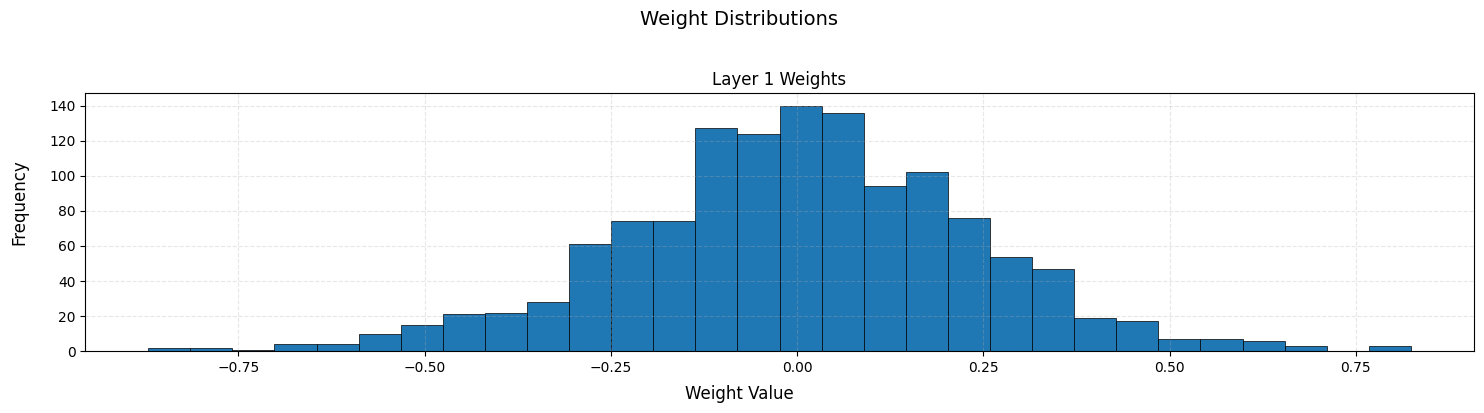

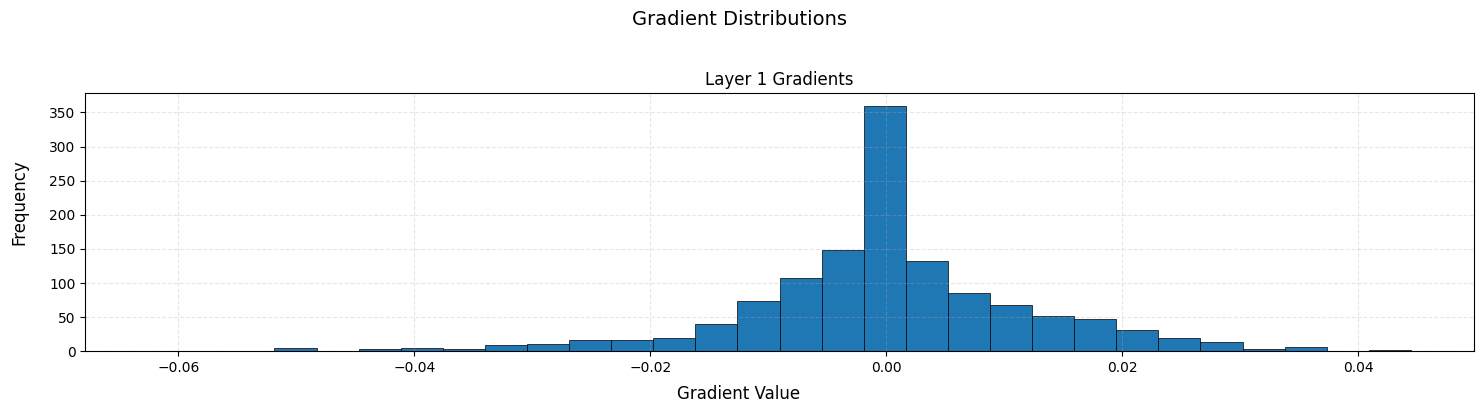

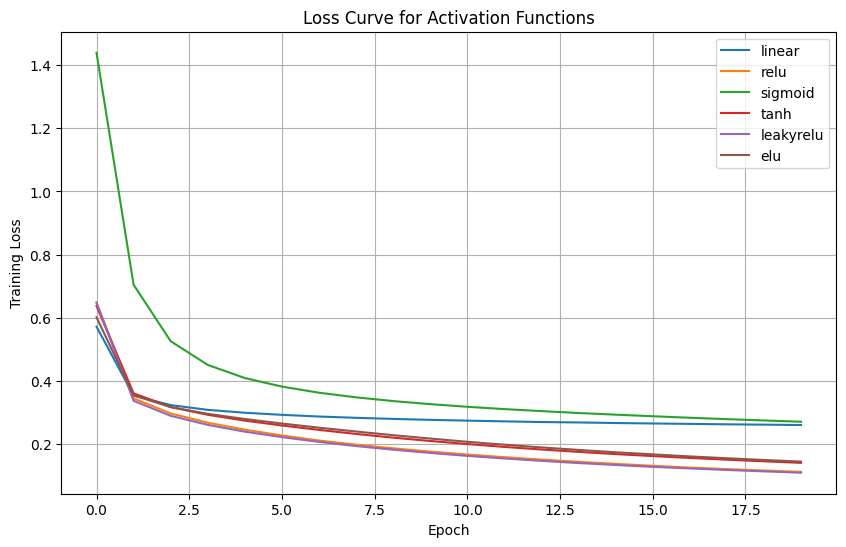

,Accuracy
leakyrelu,0.963929
relu,0.963143
elu,0.954000
tanh,0.953929
linear,0.920643
sigmoid,0.919571


In [12]:
##### EXPERIMENT 3: ACTIVATION FUNCTIONS #####
activations = ['linear', 'relu', 'sigmoid', 'tanh', 'leakyrelu', 'elu']
act_histories = {}
act_acc = {}

for act in activations:
    layers = [(784, None), (128, act), (10, "softmax")]
    model = FFNN(layers_config=layers, loss="categorical_crossentropy", weight_init_method="he")
    history, acc, trained_model = train_and_evaluate(f"Activation-{act}", model, X_train, y_train_onehot, X_test, y_test_onehot)
    act_histories[act] = history
    act_acc[act] = acc
    trained_model.plot_weights_dist([1])
    trained_model.plot_gradients_dist([1])

plot_loss_curves(act_histories, "Loss Curve for Activation Functions")
show_accuracy_table(act_acc, "Akurasi Akhir untuk Aktivasi")

Learning Rate 0.001: 0.9106


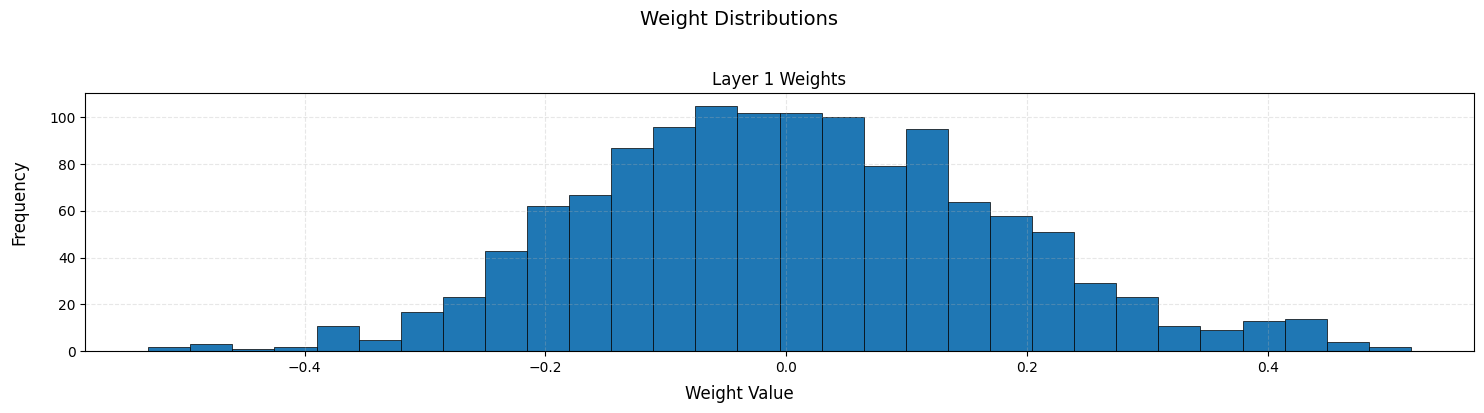

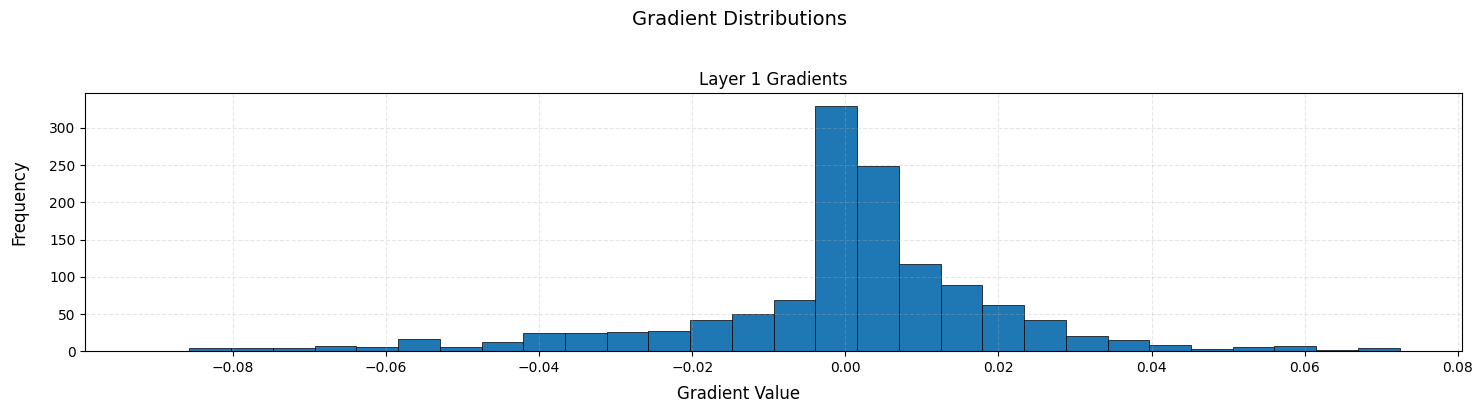

Learning Rate 0.01: 0.9638


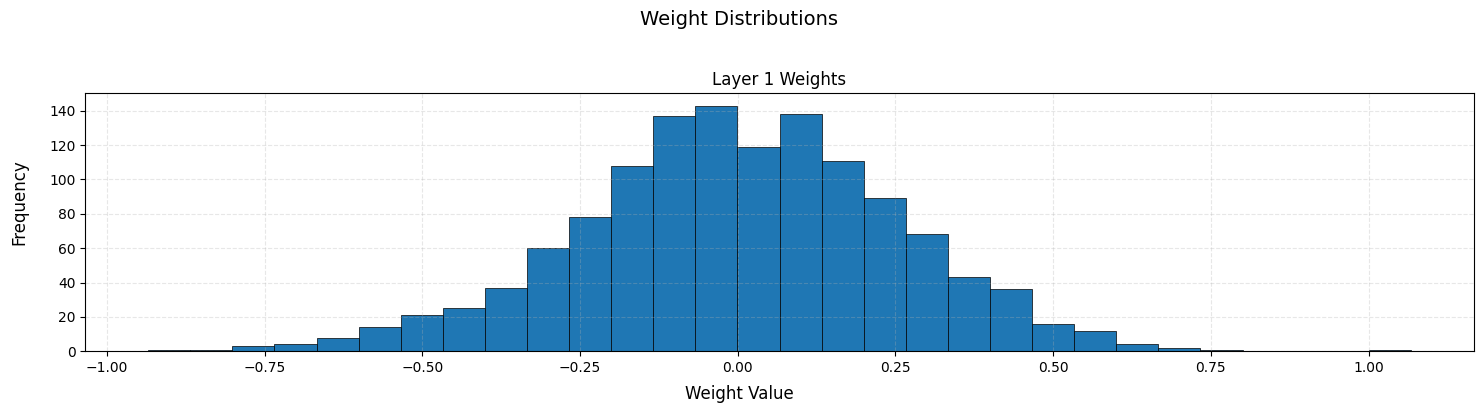

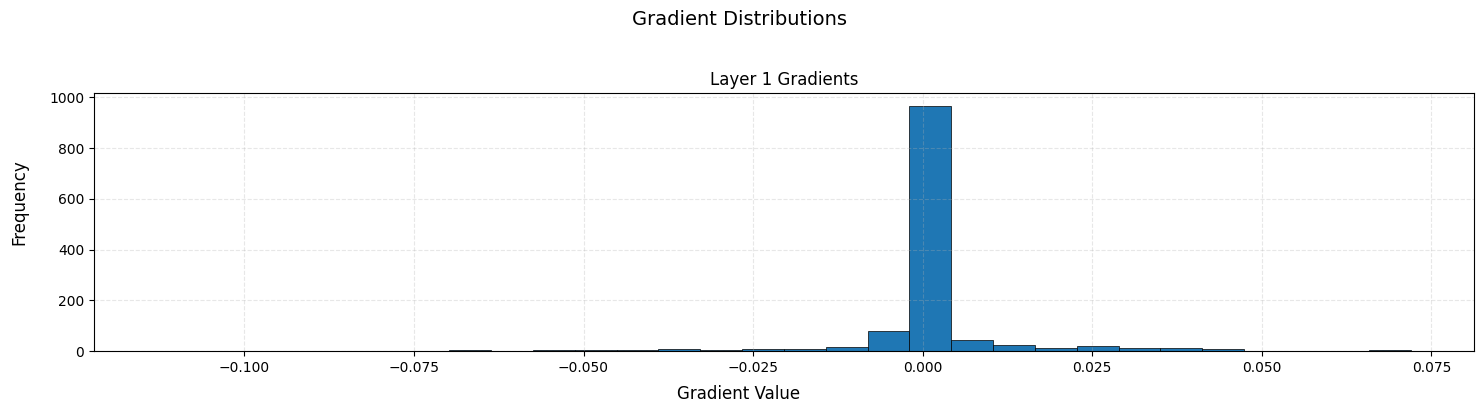

Learning Rate 0.1: 0.9793


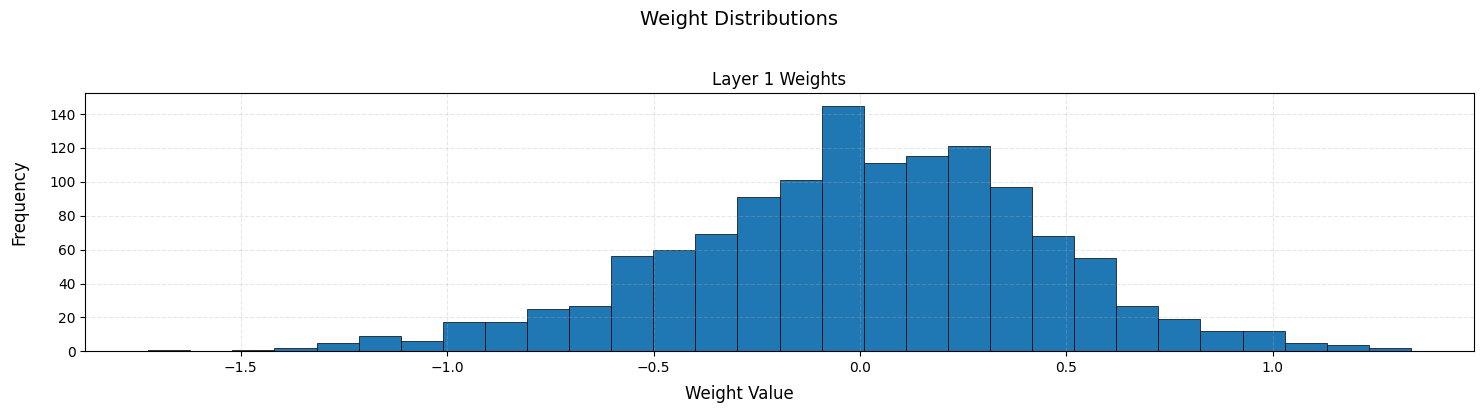

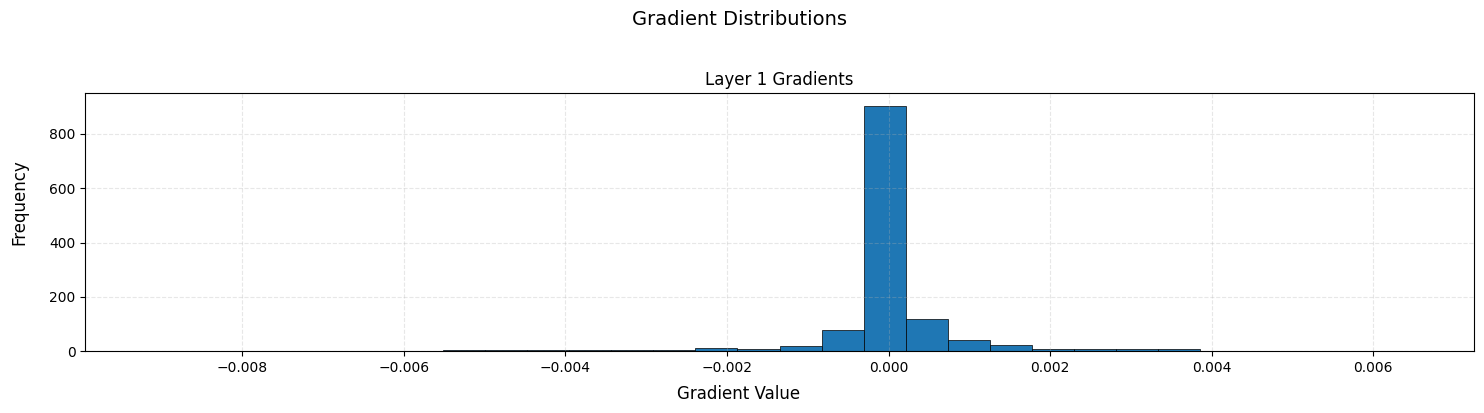

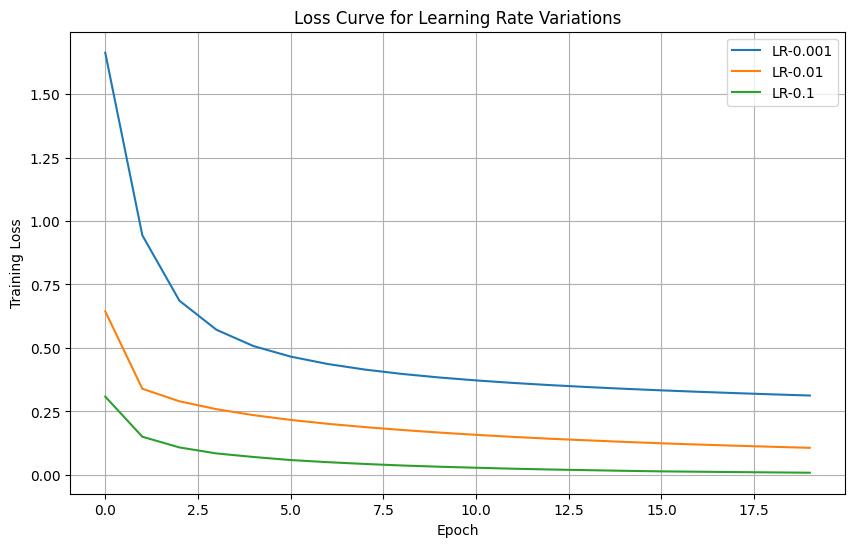

,Accuracy
LR-0.1,0.979286
LR-0.01,0.963786
LR-0.001,0.910571


In [13]:
##### EXPERIMENT 4: LEARNING RATE #####
lrs = [0.001, 0.01, 0.1]
lr_histories = {}
lr_acc = {}

for lr in lrs:
    layers = [(784, None), (128, "relu"), (10, "softmax")]
    model = FFNN(layers_config=layers, loss="categorical_crossentropy", weight_init_method="he")
    history = model.train(X_train, y_train_onehot, epochs=20, batch_size=32, learning_rate=lr, verbose=0)
    preds = model.forward(X_test)
    acc = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(preds, axis=1))
    print(f"Learning Rate {lr}: {acc:.4f}")
    lr_histories[f"LR-{lr}"] = history['train_loss']
    lr_acc[f"LR-{lr}"] = acc
    model.plot_weights_dist([1])
    model.plot_gradients_dist([1])

plot_loss_curves(lr_histories, "Loss Curve for Learning Rate Variations")
show_accuracy_table(lr_acc, "Akurasi Akhir untuk Learning Rate")

Init-zero Accuracy: 0.1139


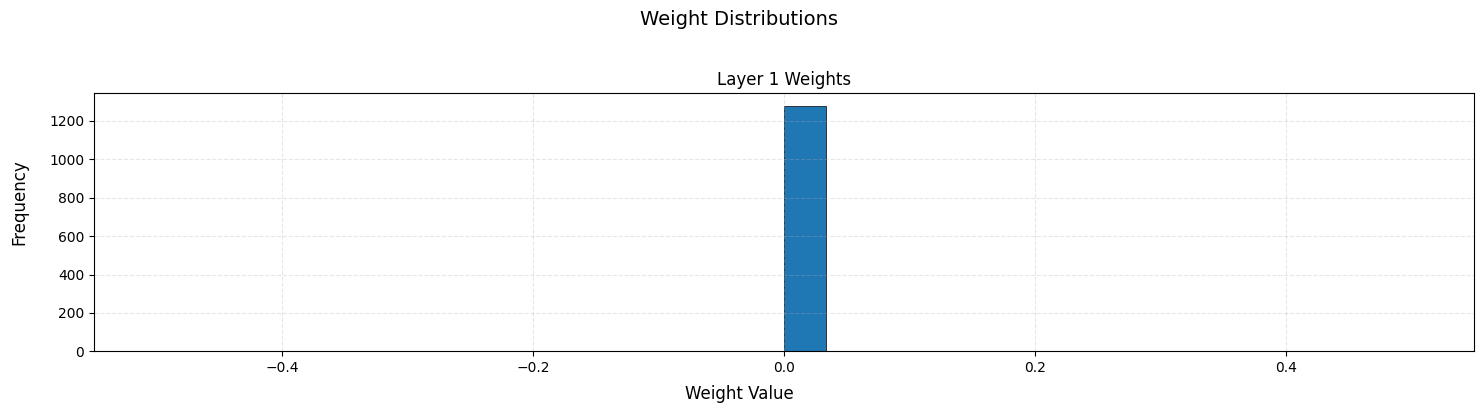

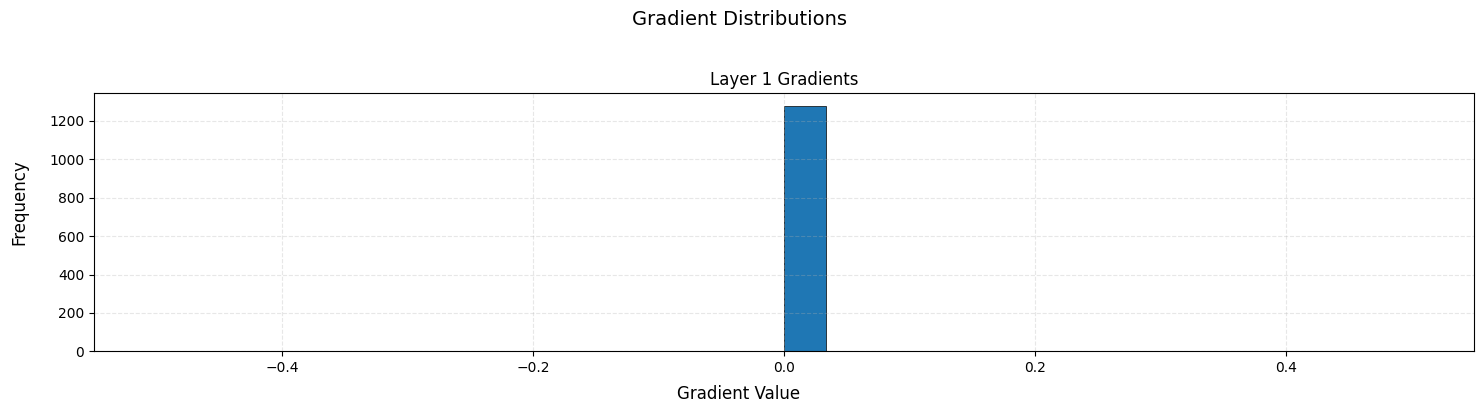

Init-random_uniform Accuracy: 0.9599


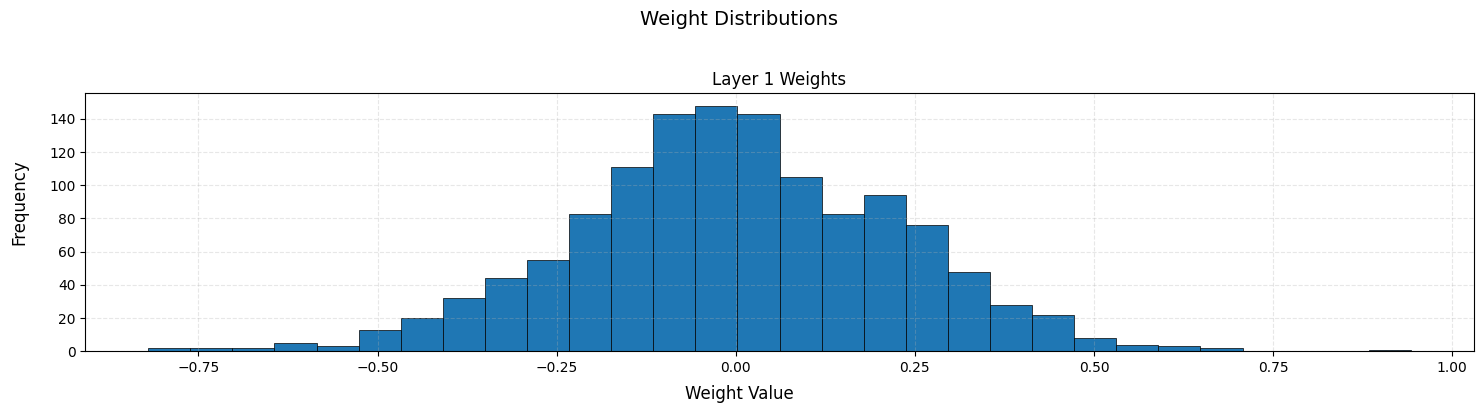

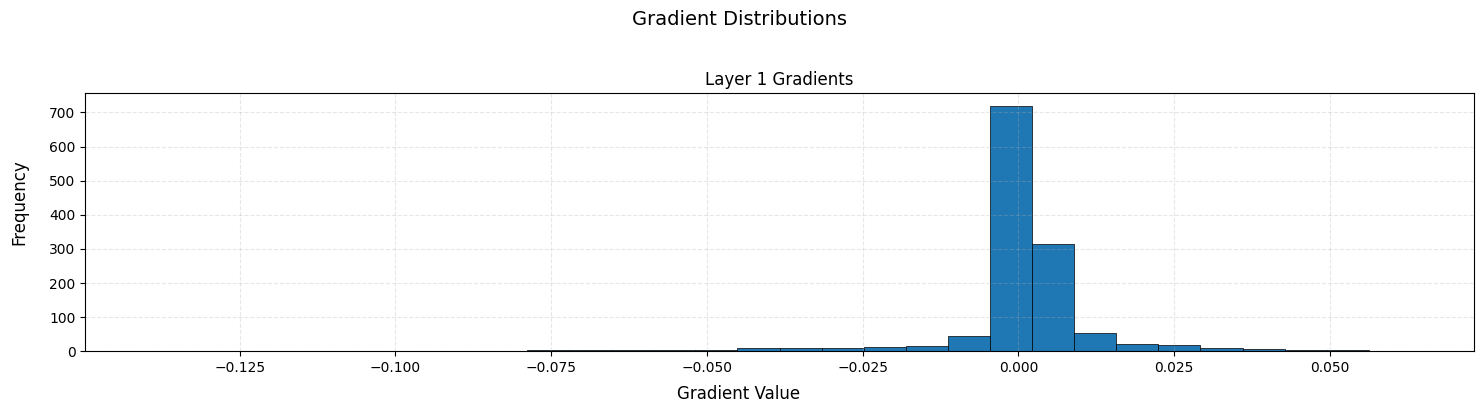

Init-random_normal Accuracy: 0.9036


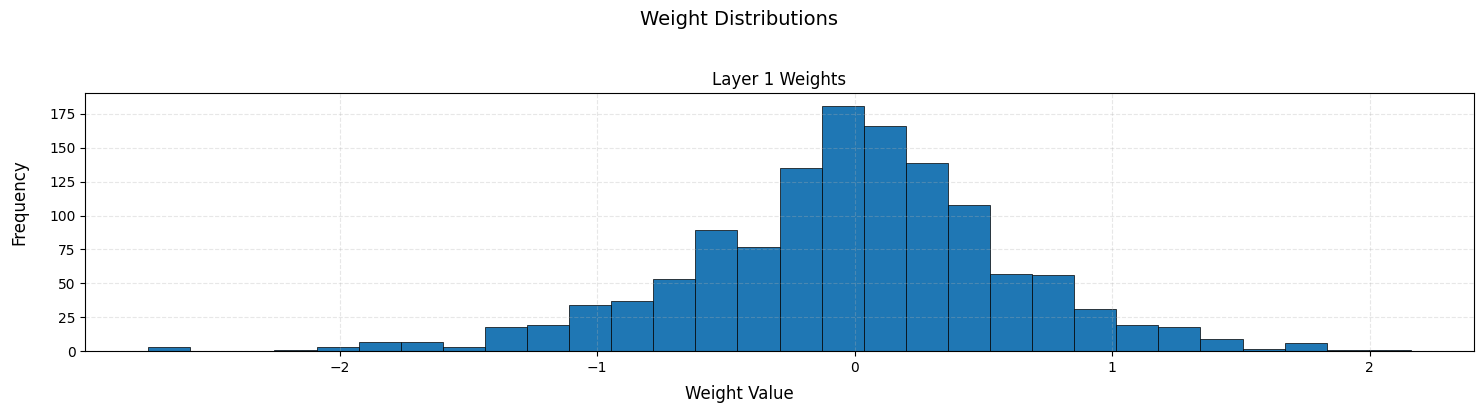

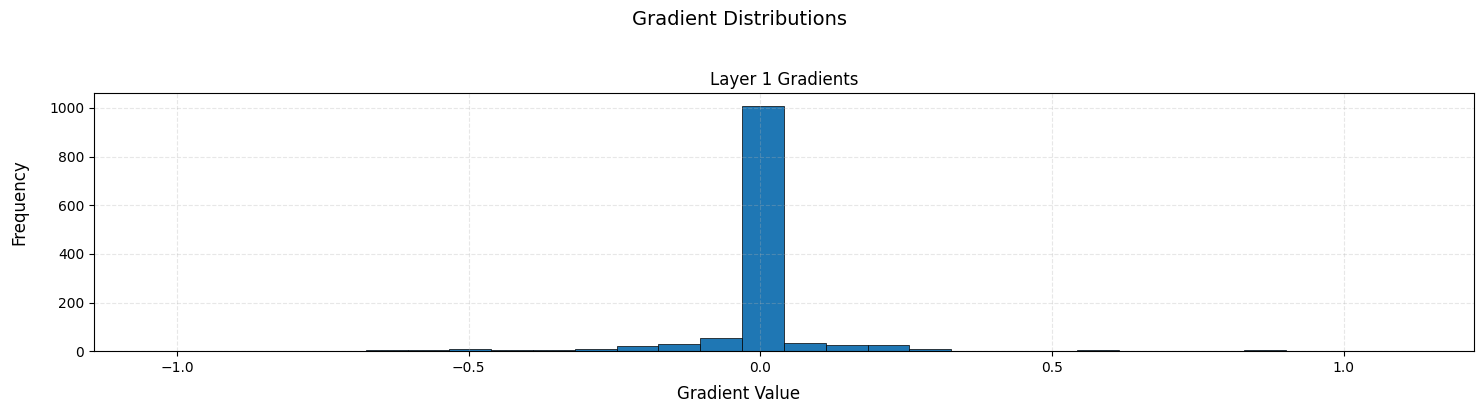

Init-he Accuracy: 0.9629


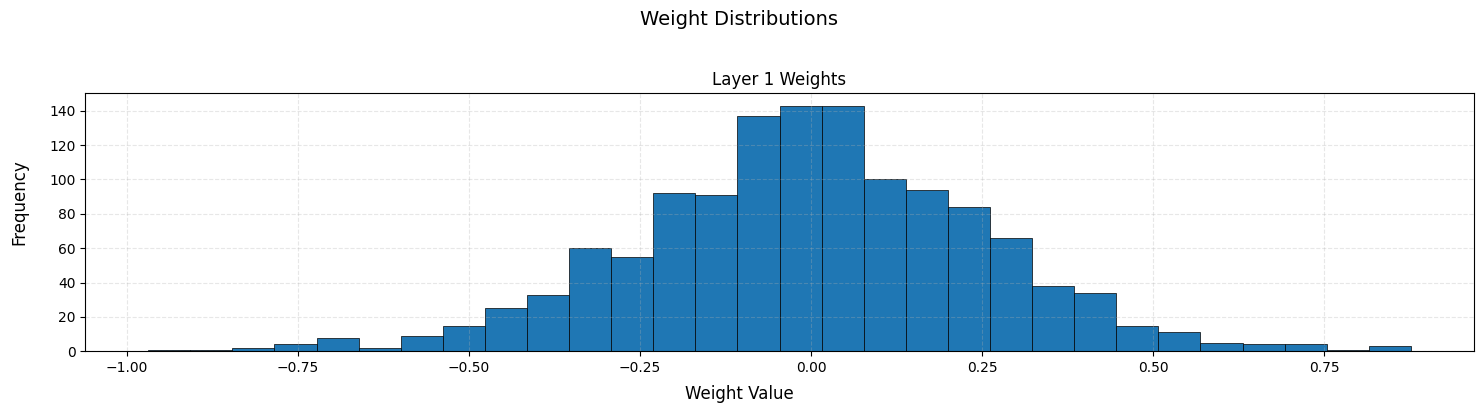

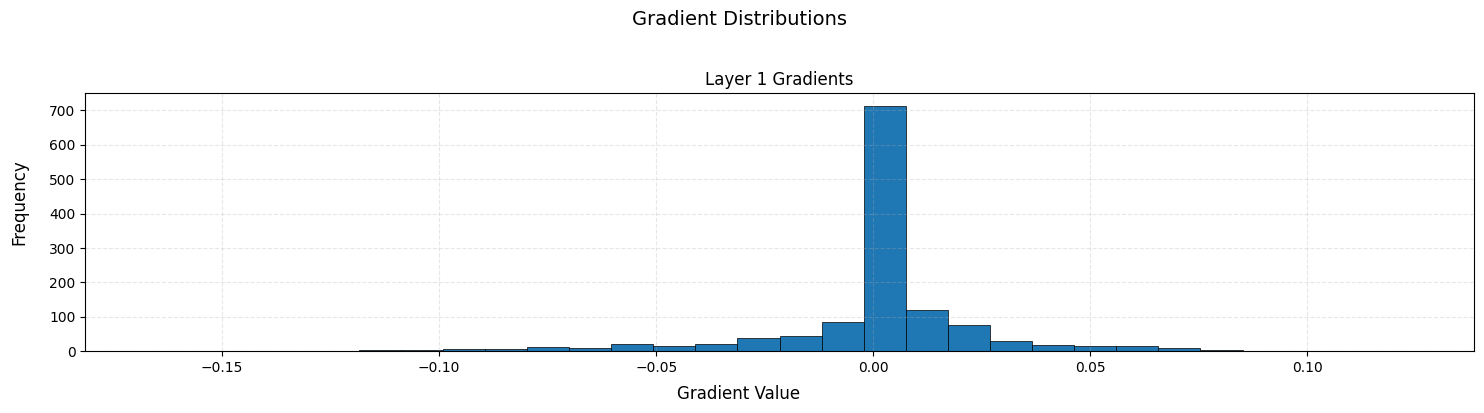

Init-xavier Accuracy: 0.9621


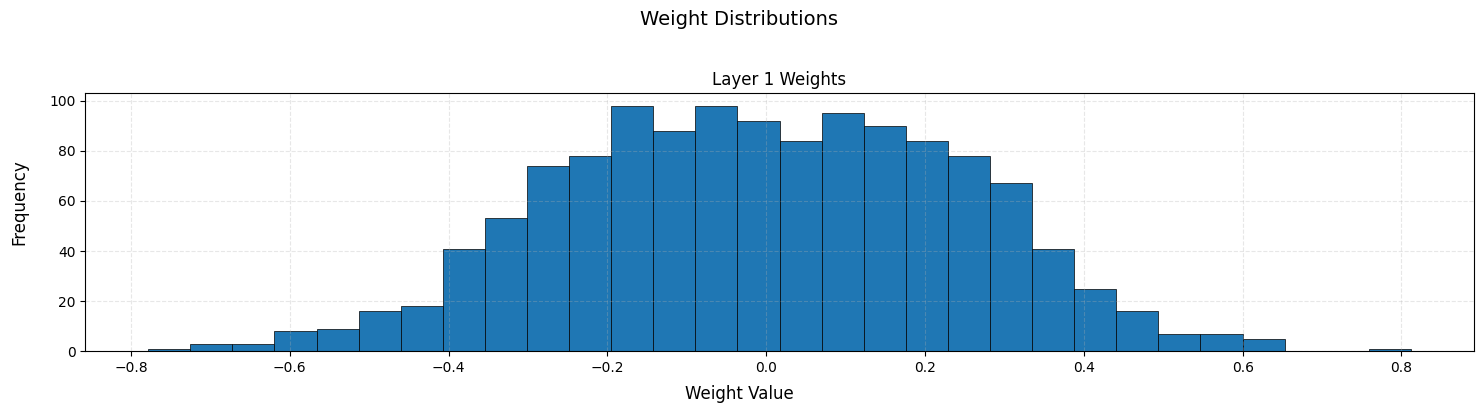

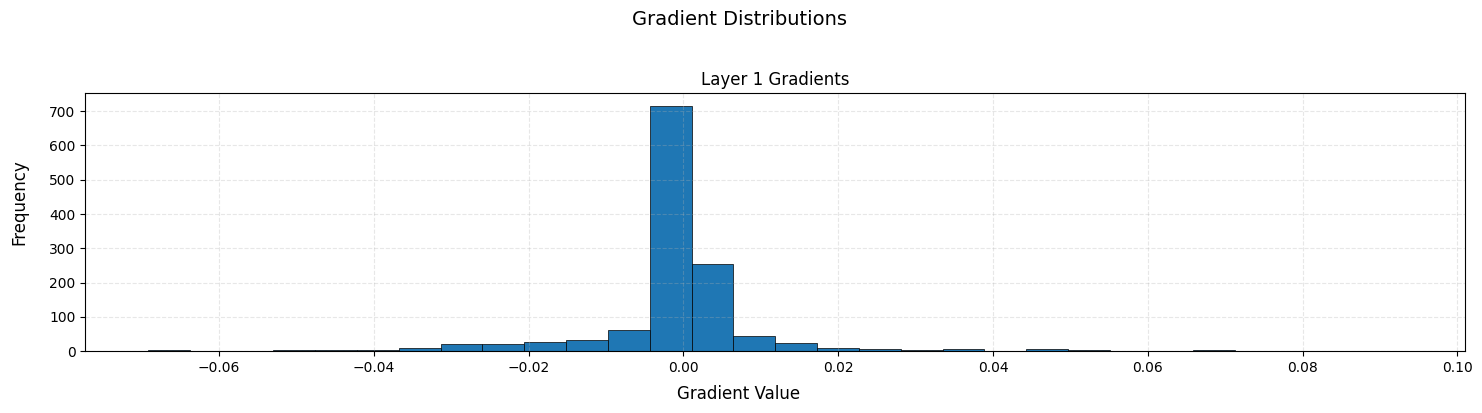

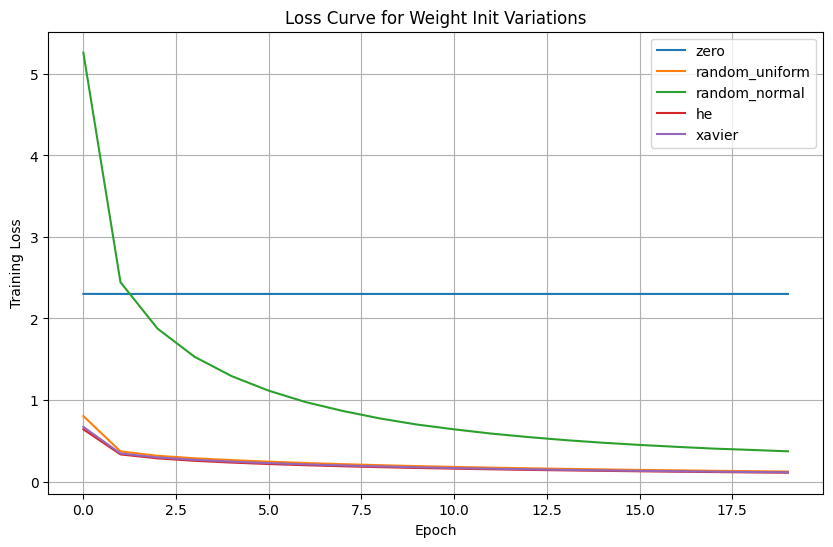

,Accuracy
he,0.962857
xavier,0.962071
random_uniform,0.959857
random_normal,0.903571
zero,0.113857


In [14]:
##### EXPERIMENT 5: WEIGHT INITIALIZATION #####
init_methods = ["zero", "random_uniform", "random_normal", "he", "xavier"]
init_histories = {}
init_acc = {}

for init in init_methods:
    model = FFNN(layers_config=[(784, None), (128, "relu"), (10, "softmax")], loss="categorical_crossentropy", weight_init_method=init)
    history, acc, trained_model = train_and_evaluate(f"Init-{init}", model, X_train, y_train_onehot, X_test, y_test_onehot)
    init_histories[init] = history
    init_acc[init] = acc
    trained_model.plot_weights_dist([1])
    trained_model.plot_gradients_dist([1])

plot_loss_curves(init_histories, "Loss Curve for Weight Init Variations")
show_accuracy_table(init_acc, "Akurasi Akhir untuk Weight Init")


In [15]:
##### EXPERIMENT 6: SKLEARN COMPARISON #####

sklearn_model = MLPClassifier(
    hidden_layer_sizes=(128,), activation='relu', solver='adam', alpha=0.0001,
    batch_size=32, learning_rate_init=0.01, max_iter=20, random_state=69
)
start = time.time()
sklearn_model.fit(X_train, y_train)
end = time.time()

sklearn_preds = sklearn_model.predict(X_test)
sklearn_acc = accuracy_score(y_test, sklearn_preds)
print(f"sklearn MLPClassifier Accuracy: {sklearn_acc:.4f} (Training Time: {end - start:.2f}s)")


sklearn MLPClassifier Accuracy: 0.9591 (Training Time: 44.02s)


c:\Users\tfpri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# Custom FFNN dengan hyperparameter yang sama persis dengan sklearn
layers_config = [
    (784, None),
    (128, "relu"),
    (10, "softmax")
]

custom_model = FFNN(
    layers_config=layers_config,
    loss="categorical_crossentropy",
    weight_init_method="he",
    l2_lambda=0.0001  
)

start_custom = time.time()
custom_history = custom_model.train(
    X_train, y_train_onehot,
    epochs=20,         
    batch_size=32,       
    learning_rate=0.01,  
    verbose=0
)
end_custom = time.time()

custom_preds = custom_model.forward(X_test)
custom_pred_classes = np.argmax(custom_preds, axis=1)
custom_acc = accuracy_score(y_test, custom_pred_classes)

print("🔍 Hasil Perbandingan Akhir")
print(f"Custom FFNN Accuracy: {custom_acc:.4f} (Waktu: {end_custom - start_custom:.2f}s)")
print(f"Sklearn MLP Accuracy: {sklearn_acc:.4f} (Waktu: {end - start:.2f}s)")


🔍 Hasil Perbandingan Akhir
Custom FFNN Accuracy: 0.9639 (Waktu: 29.91s)
Sklearn MLP Accuracy: 0.9591 (Waktu: 44.02s)


Training No Regularization
No Regularization Accuracy: 0.9619
Training L1 Regularization
L1 Regularization Accuracy: 0.9622
Training L2 Regularization
L2 Regularization Accuracy: 0.9634
Training L1 + L2 Regularization
L1 + L2 Regularization Accuracy: 0.9609


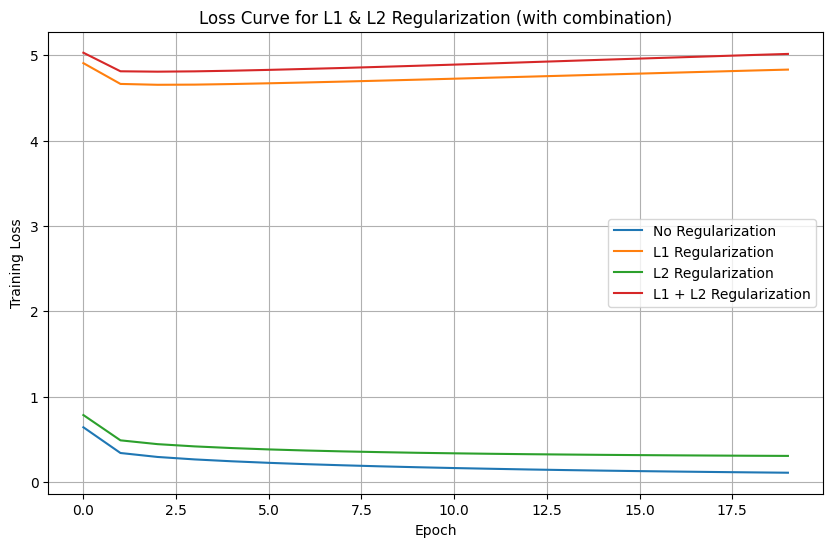

,Accuracy
L2 Regularization,0.963429
L1 Regularization,0.962214
No Regularization,0.961929
L1 + L2 Regularization,0.960857



No Regularization - Weights Distribution


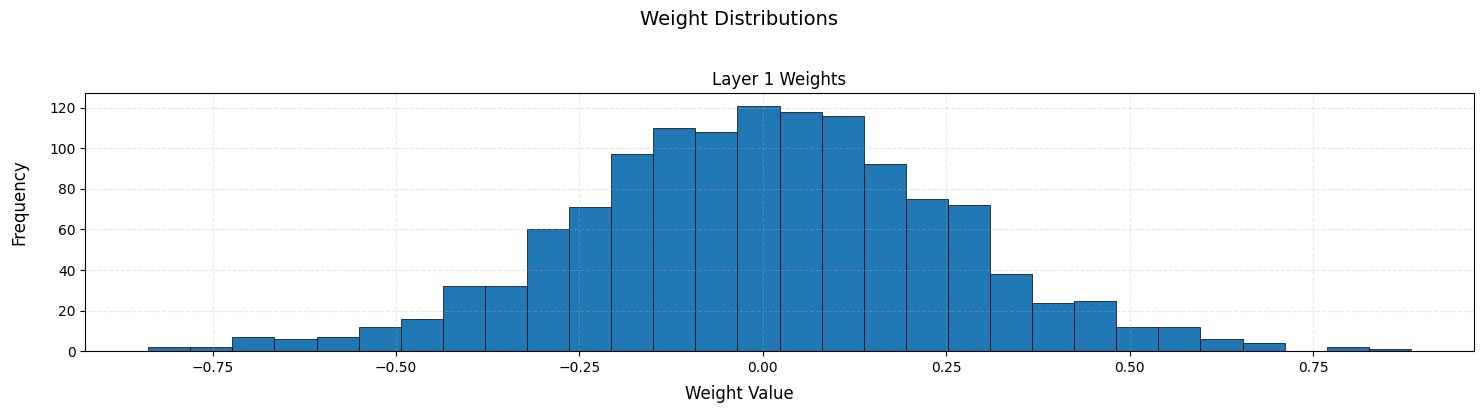

No Regularization - Gradients Distribution


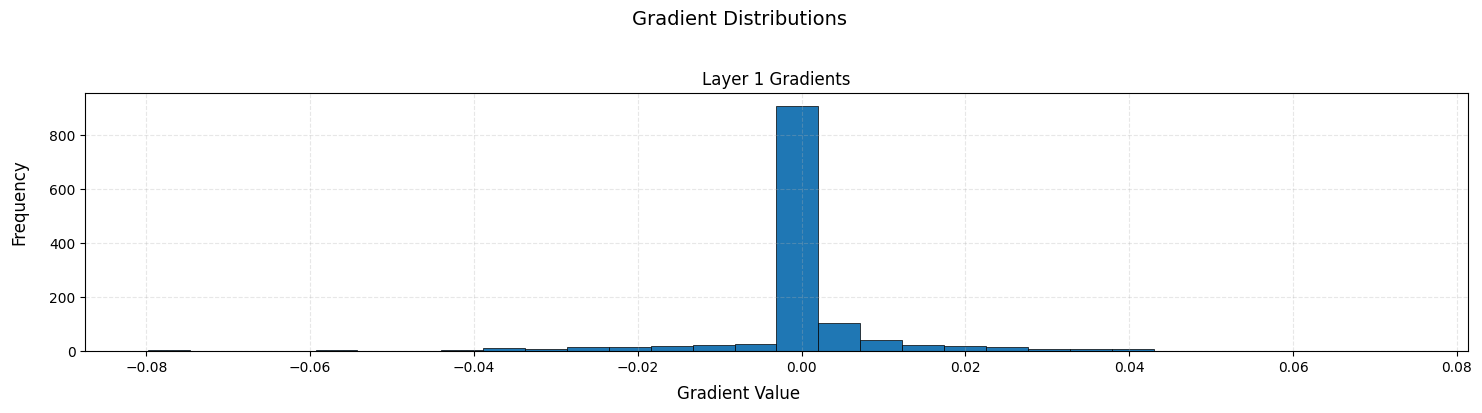


L1 Regularization - Weights Distribution


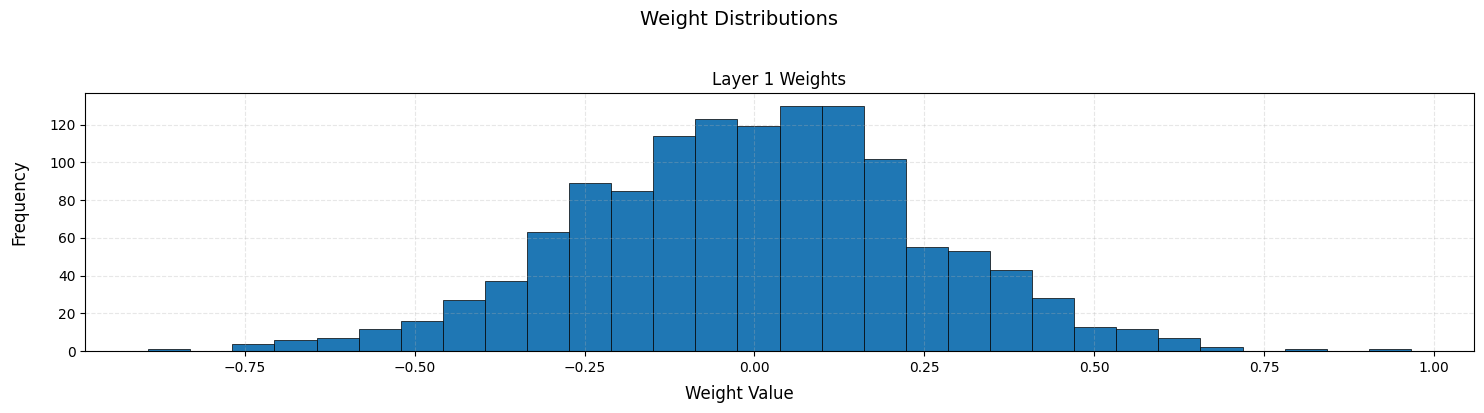

L1 Regularization - Gradients Distribution


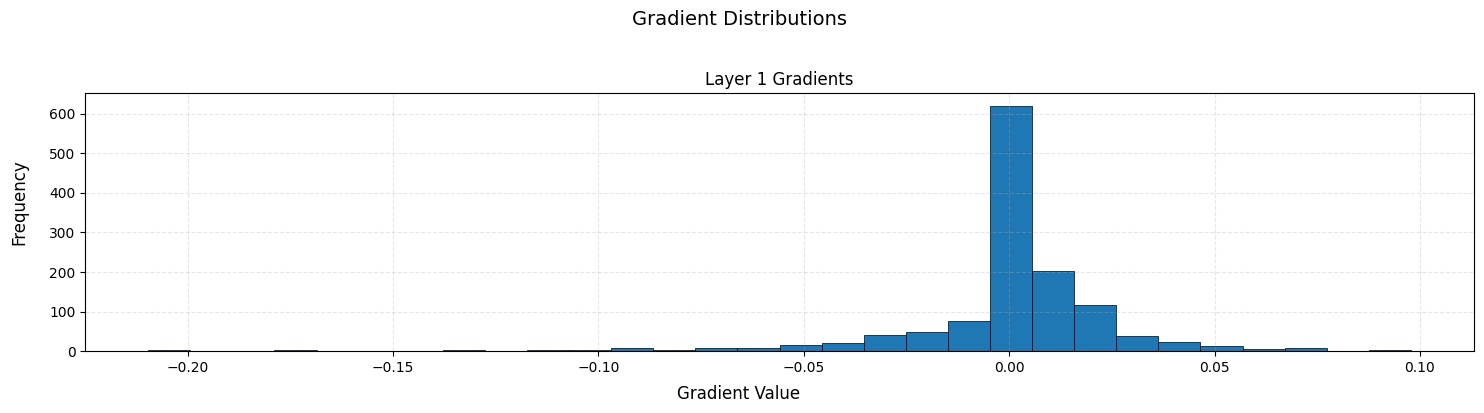


L2 Regularization - Weights Distribution


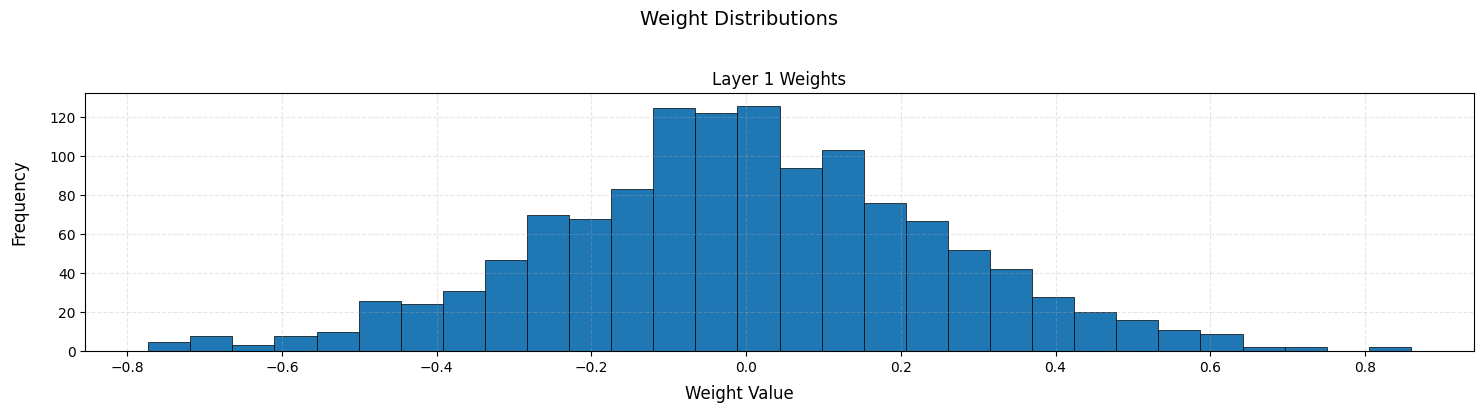

L2 Regularization - Gradients Distribution


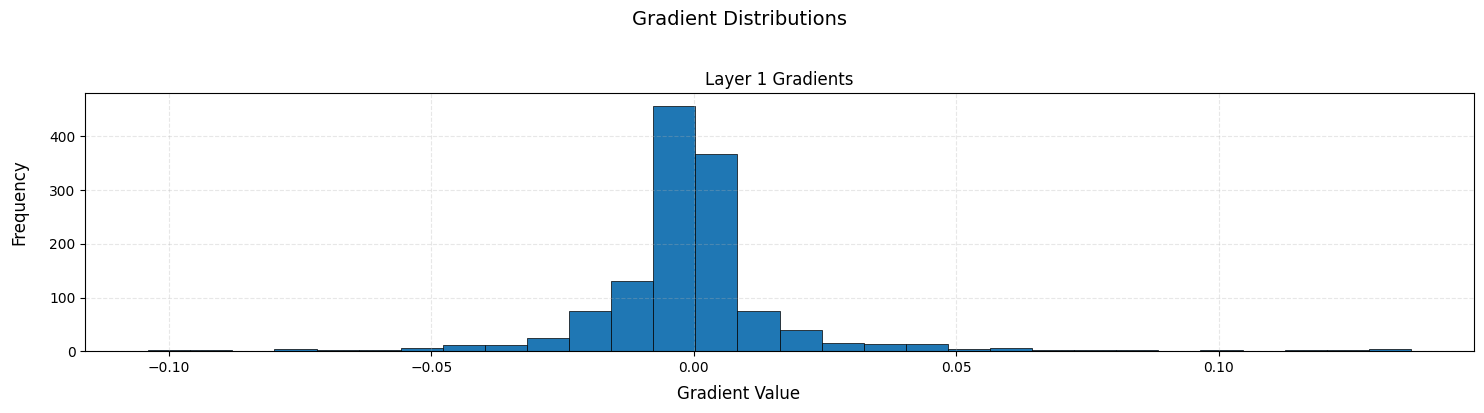


L1 + L2 Regularization - Weights Distribution


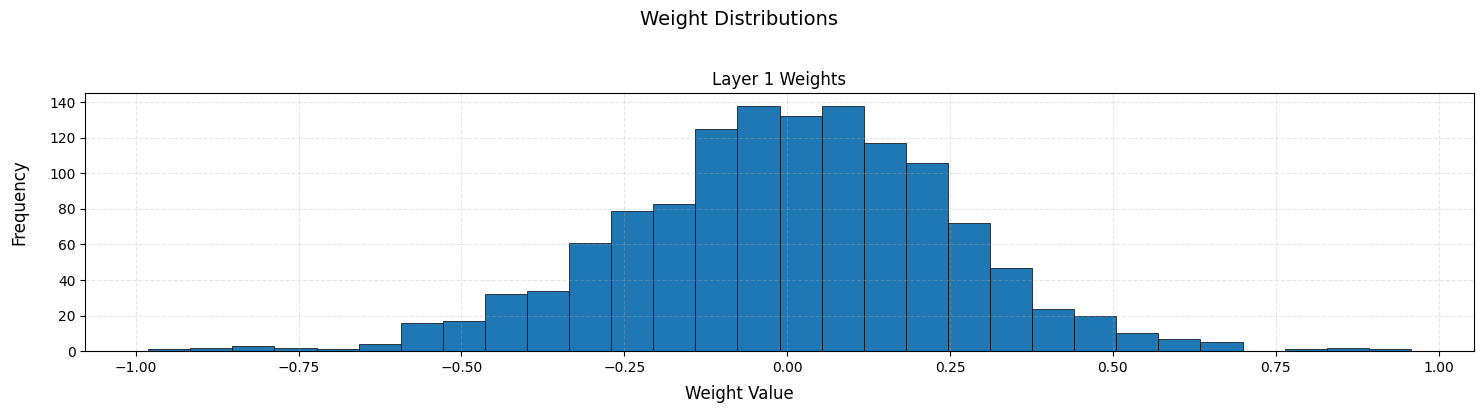

L1 + L2 Regularization - Gradients Distribution


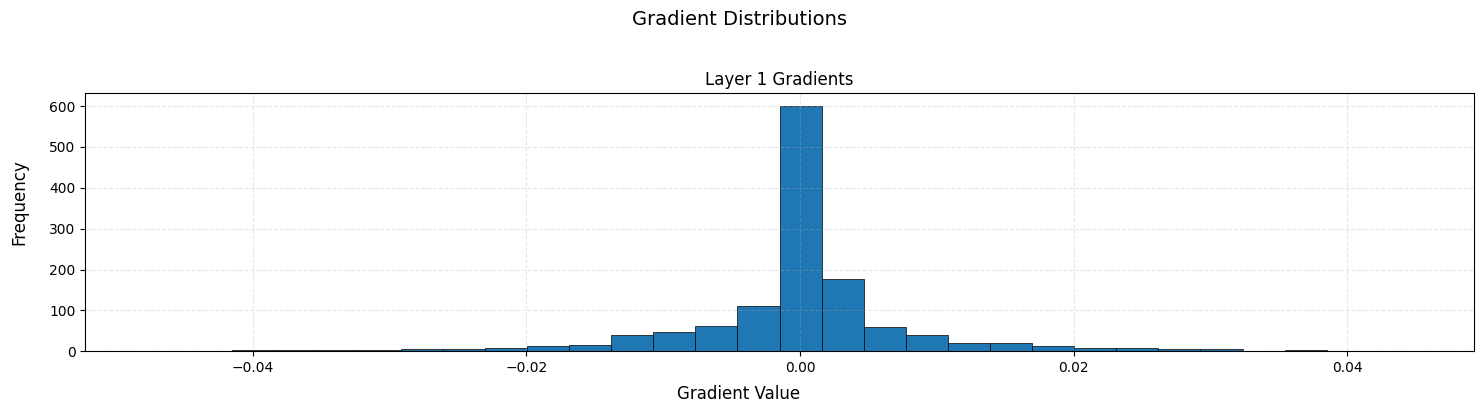

In [17]:
configs = {
    "No Regularization": {"l1_lambda": 0.0, "l2_lambda": 0.0},
    "L1 Regularization": {"l1_lambda": 0.001, "l2_lambda": 0.0},
    "L2 Regularization": {"l1_lambda": 0.0, "l2_lambda": 0.001},
    "L1 + L2 Regularization": {"l1_lambda": 0.001, "l2_lambda": 0.001},
}

histories_reg = {}
acc_reg = {}
models_reg = {}

for name, reg_params in configs.items():
    print(f"Training {name}")
    layers_config = [
        (784, None),
        (128, "relu"),
        (10, "softmax")
    ]
    model = FFNN(
        layers_config=layers_config,
        loss="categorical_crossentropy",
        weight_init_method="he",
        l1_lambda=reg_params["l1_lambda"],
        l2_lambda=reg_params["l2_lambda"]
    )
    history, acc, trained_model = train_and_evaluate(
        name, model, X_train, y_train_onehot, X_test, y_test_onehot
    )
    histories_reg[name] = history
    acc_reg[name] = acc
    models_reg[name] = trained_model

plot_loss_curves(histories_reg, "Loss Curve for L1 & L2 Regularization (with combination)")
show_accuracy_table(acc_reg, "Accuracy Comparison for Regularization (with combination)")

for name, model in models_reg.items():
    print(f"\n{name} - Weights Distribution")
    plot_weights_distribution(model, [1])
    print(f"{name} - Gradients Distribution")
    plot_gradients_distribution(model, [1])

Training No Normalization
No Normalization Accuracy: 0.9634
Training RMSNorm
RMSNorm Accuracy: 0.9723


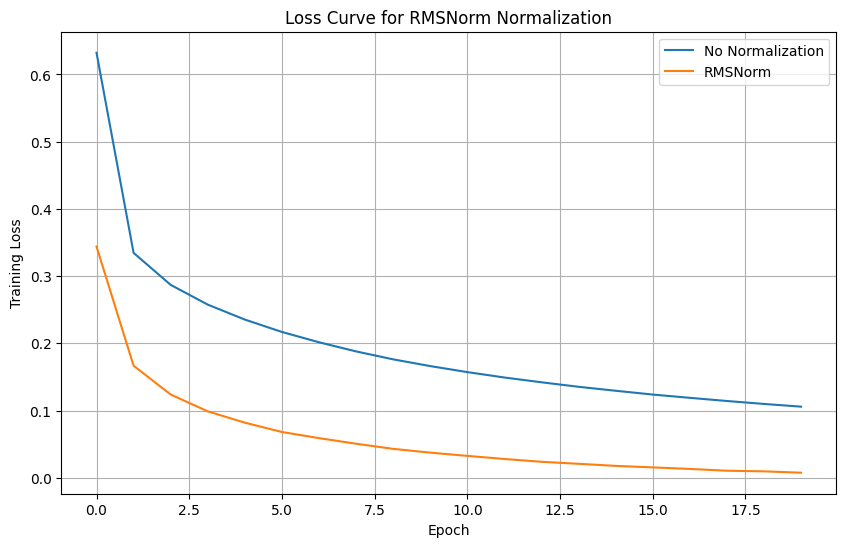

,Accuracy
RMSNorm,0.972286
No Normalization,0.963429



No Normalization - Weights Distribution


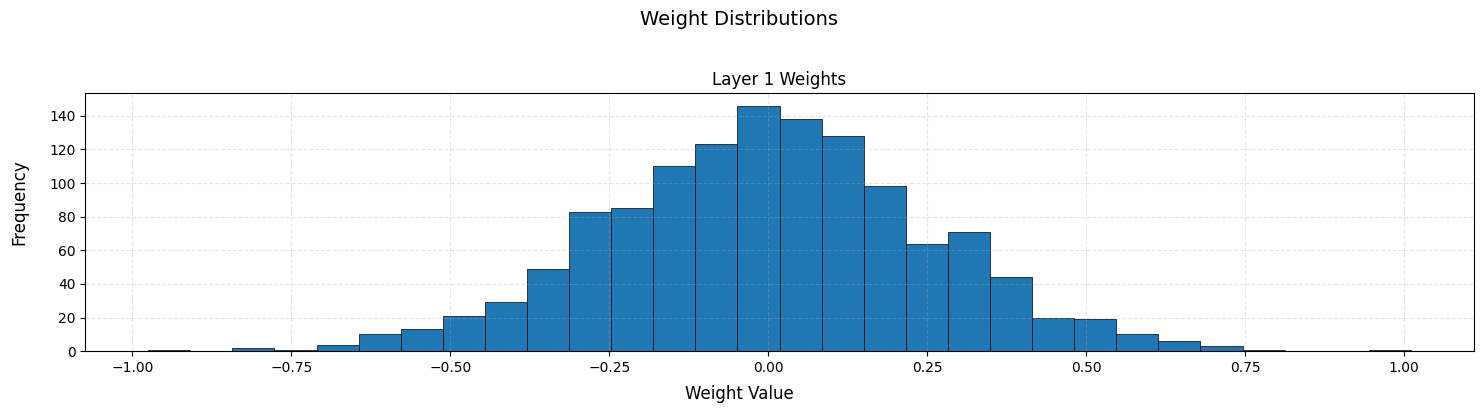

No Normalization - Gradients Distribution


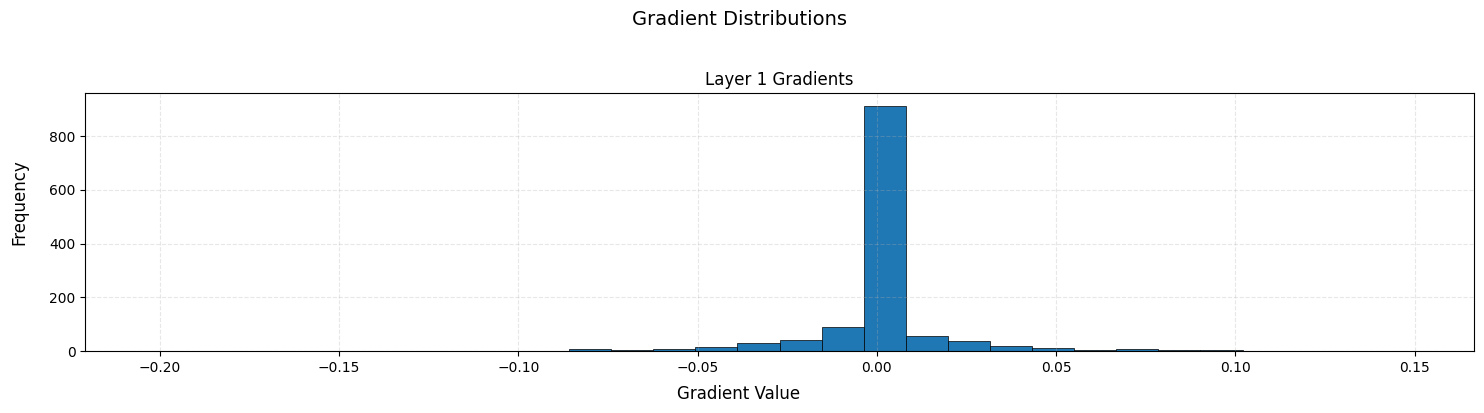


RMSNorm - Weights Distribution


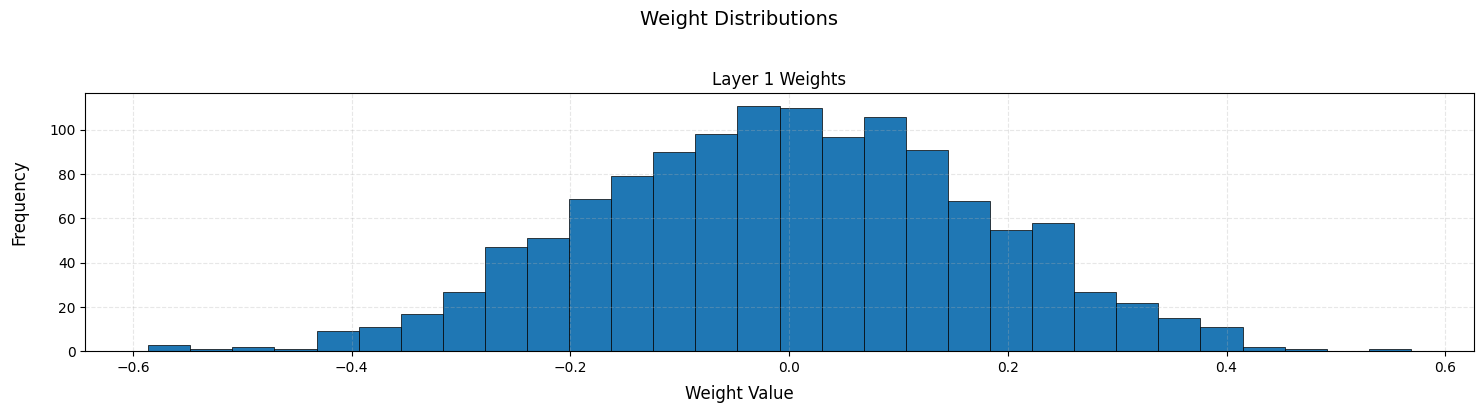

RMSNorm - Gradients Distribution


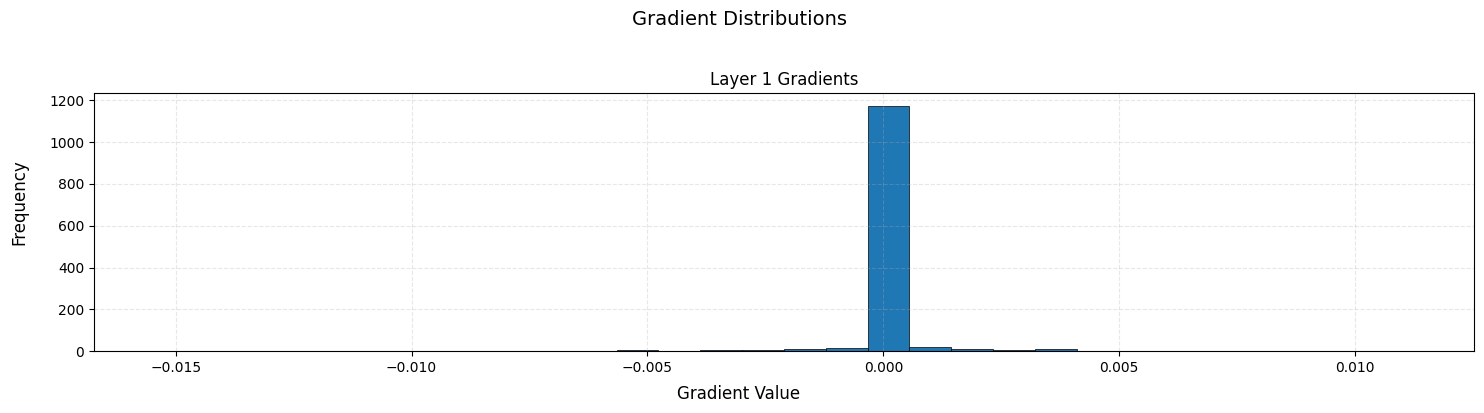

In [18]:
## RMSNorm Normalization

configs_rms = {
    "No Normalization": {"rms_norm": False},
    "RMSNorm": {"rms_norm": True}
}

histories_rms = {}
acc_rms = {}
models_rms = {}

for name, rms_params in configs_rms.items():
    print(f"Training {name}")
    layers_config = [
        (784, None),
        (128, "relu", rms_params),
        (10, "softmax")
    ]
    model = FFNN(
        layers_config=layers_config,
        loss="categorical_crossentropy",
        weight_init_method="he"
    )
    history, acc, trained_model = train_and_evaluate(name, model, X_train, y_train_onehot, X_test, y_test_onehot)
    histories_rms[name] = history
    acc_rms[name] = acc
    models_rms[name] = trained_model

plot_loss_curves(histories_rms, "Loss Curve for RMSNorm Normalization")
show_accuracy_table(acc_rms, "Accuracy Comparison for RMSNorm")

for name, model in models_rms.items():
    print(f"\n{name} - Weights Distribution")
    plot_weights_distribution(model, [1])
    print(f"{name} - Gradients Distribution")
    plot_gradients_distribution(model, [1])
